<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/artifact_versioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 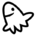 deepdriver artifact versioning tutorial!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [1]:
pip install deepdriver==0.0.48

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 5.4 MB/s 
     |████████████████████████████████| 2.4 MB 90.1 MB/s 
     |████████████████████████████████| 409 kB 70.8 MB/s 
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42917 sha256=70b34a6129ee1b1ce58e208c8335ddb8aa4523e409e61eb1505c7368e0f8ce4a
  Stored in directory: /root/.cache/pip/wheels/57/86/c9/1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.11 which is incompatible.
te

#1. ➕ import deepdriver



In [2]:
import deepdriver

#2. ⚙ deepdriver server setting

Set to the IP of the host where deepdriver CE is installed.

In [3]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [4]:
deepdriver.login(key="MGY2ZWY5NjY0NjE3YjVkODBhNGRkYjBkZDAzYzQ5MGMxMzVhZWRhNzkyYTdiNDI4ZGZmYjZmZDhmYzdkY2I3ZQ==")

True

#4. 🥼 create experiment and run

In [8]:
epoch =10

In [16]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "arti_test_" +host_name +"_"+date

In [17]:
# experiment init & config hyperparam
deepdriver.init(exp_name= make_exp_name())

2022-12-12 04:33:17,082 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=arti_test_991b59c549bf_20221212
Run Name=sable-life-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/arti_test_991b59c549bf_20221212/sable-life-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=arti_test_991b59c549bf_20221212
Run Name=sable-life-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/arti_test_991b59c549bf_20221212/sable-life-1/run/chart


#5. ⬆ upload artifact multiple time

5-1. create artifact & uplodad artifact

In [18]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [19]:
arti.add("/content/sample_data")

In [20]:
[ent.path for ent  in arti.entry_list]

['README.md',
 'anscombe.json',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [21]:
deepdriver.upload_artifact(arti)

Uploading: [./sample_data/california_housing_train.csv] |██████████████████████████████| [100.0%] [6/6]

True

5-2. add another data to same artifact & upload artifact

In [22]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [23]:
arti.add("/content/cat_dog")

In [24]:
deepdriver.upload_artifact(arti)

Uploading: [./cat_dog/cat/cat.png] |██████████████████████████████| [100.0%] [2/2]

True

#6. ⬇ download artifact with specific version

6-0. create function for print subfolders and files

In [42]:
import shutil
import os
def showSubFileAndDir(download_dir):
  for (root, directories, files) in os.walk(download_dir):
    for d in directories:
        d_path = os.path.join(root, d)
        print(d_path)

    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)

6-1. download V1

In [25]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset",tag ="V1")

2022-12-12 04:34:56,167 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{4}


INFO:deepdriver:artifact is got! 
 artifact id :{4}


In [26]:
arti2.download()

Downloading: [./deepdriver/artifact/4/mnist_train_small.csv] |██████████████████████████████| [100.0%] [6/6]

'./deepdriver/artifact/4'

In [29]:
download_dir = "./deepdriver/artifact/" +str(arti2.id)

In [39]:
showSubFileAndDir(download_dir)

./deepdriver/artifact/4/mnist_train_small.csv
./deepdriver/artifact/4/mnist_test.csv
./deepdriver/artifact/4/README.md
./deepdriver/artifact/4/anscombe.json
./deepdriver/artifact/4/california_housing_test.csv
./deepdriver/artifact/4/california_housing_train.csv


In [43]:
shutil.rmtree(download_dir)

6-2. download V2

In [44]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset",tag ="V2")

2022-12-12 04:57:05,985 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{4}


INFO:deepdriver:artifact is got! 
 artifact id :{4}


In [45]:
arti2.download()

Downloading: [./deepdriver/artifact/4/mnist_train_small.csv] |██████████████████████████████| [100.0%] [8/8]

'./deepdriver/artifact/4'

In [46]:
showSubFileAndDir(download_dir)

./deepdriver/artifact/4/dog
./deepdriver/artifact/4/cat
./deepdriver/artifact/4/mnist_train_small.csv
./deepdriver/artifact/4/mnist_test.csv
./deepdriver/artifact/4/README.md
./deepdriver/artifact/4/anscombe.json
./deepdriver/artifact/4/california_housing_test.csv
./deepdriver/artifact/4/california_housing_train.csv
./deepdriver/artifact/4/dog/dog.png
./deepdriver/artifact/4/cat/cat.png


#8. 🔚 finish run

In [47]:
# finish experiment
deepdriver.finish()

True